<a href="https://colab.research.google.com/github/Brymer-Meneses/PyTorch-Basics/blob/master/style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn, optim
from torchvision import transforms, models
from torchvision.utils import save_image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = models.vgg19(pretrained=True).features

In [ ]:
image_size = 512

In [ ]:
class VGG(nn.Module):
  def __init__(self):
    super(VGG, self).__init__()

    self.chosen_features = ['0', '5', '10', '19', '28']
    self.model = models.vgg19(pretrained=True).features[:29]

    return

  def forward(self, x):
    features = []

    for layer_num, layer in enumerate(self.model):
      x = layer(x)

      if str(layer_num) in self.chosen_features:
        features.append(x)

    return features

In [ ]:
loader = transforms.Compose([
                             #transforms.ToPILImage(),
                             transforms.Resize((image_size, image_size)),
                             transforms.ToTensor(),
                             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
                             ])

In [ ]:
def load_image(image_name):
  image = Image.open(image_name)
  image = loader(image).unsqueeze(0)
  return image.to(device)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
image_size = 512

In [ ]:
content_path = "/content/drive/My Drive/External Datasets/painting/content_final.jpg"
style_path = "/content/drive/My Drive/External Datasets/painting/style_final.jpg"

In [ ]:
def show_img(path):
  image = Image.open(path)
  plt.imshow(image)
  plt.show()

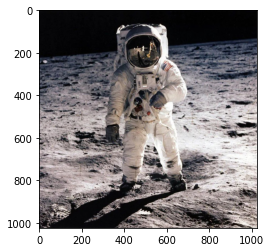

In [ ]:
show_img(content_path)

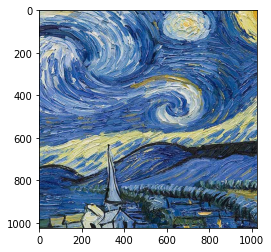

In [ ]:
show_img(style_path)

In [ ]:

model = VGG().to(device).eval()

In [ ]:
original_img = load_image(content_path)
style_img = load_image(style_path)
generated = original_img.clone().requires_grad_(True)

139066512.0


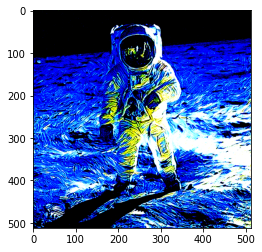

88519912.0


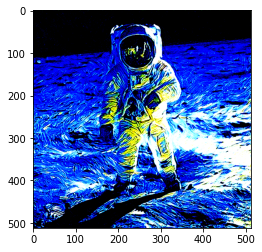

62467232.0


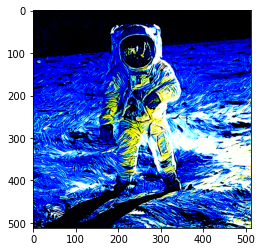

50265868.0


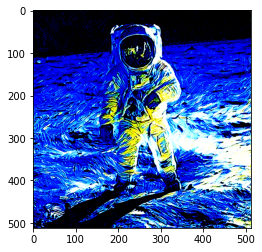

43615824.0


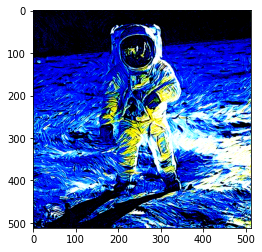

39331300.0


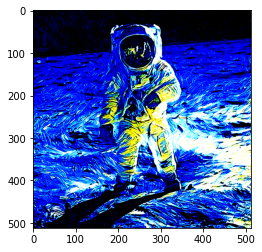

36447812.0


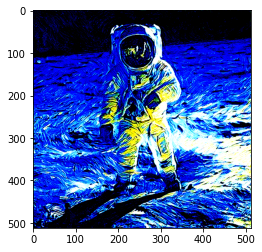

34304752.0


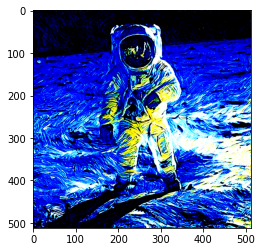

32549590.0


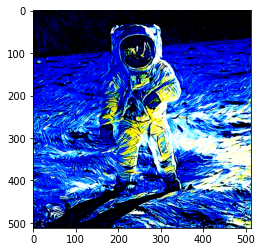

31175900.0


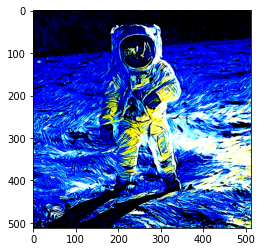

30045650.0


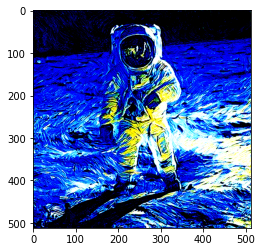

29144482.0


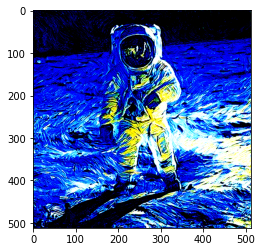

28259390.0


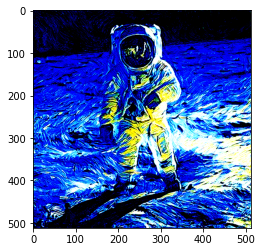

27647068.0


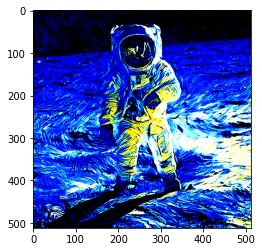

26897156.0


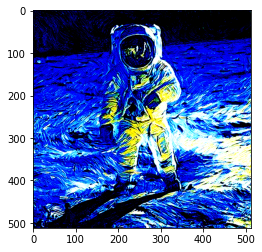

26376888.0


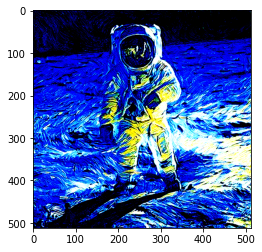

25822236.0


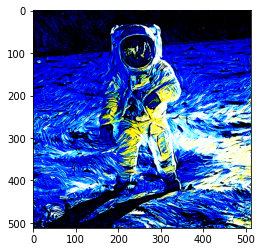

25400440.0


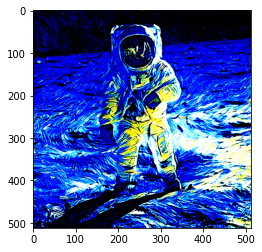

24945068.0


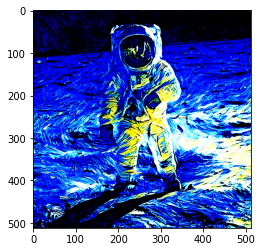

24638042.0


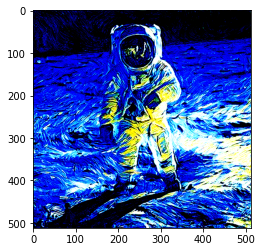

In [ ]:
# Hyperparameters 
total_steps = 10000
learning_rate = 0.001

alpha = 1
beta = 100
optimizer = optim.Adam([generated], lr = learning_rate)

model = VGG().to(device).eval()

for step in range(total_steps):
  generated_features = model(generated)
  original_img_features = model(original_img)
  style_features = model(style_img)

  style_loss = original_loss = 0

  for gen_feature, orig_feature, style_feature in zip(
      generated_features, original_img_features, style_features
  ):
    batch_size, channel, height, width = gen_feature.shape
    original_loss += torch.mean((gen_feature - orig_feature)**2) # original loss

    # compute gram matrix
    G = gen_feature.view(channel, height*width).mm(
        gen_feature.view(channel, height*width).t()
    )

    A = style_feature.view(channel, height*width).mm(
        style_feature.view(channel, height*width).t()
    )

    style_loss += torch.mean((G-A)**2)

  total_loss = alpha*original_loss + beta*style_loss
  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()

  if step % 500 == 0:
    print(total_loss.item())
    save_image(generated, "generated.png")
    show_img('/content/generated.png')

In [ ]:
os.chdir('/content/drive/My Drive')
save_image(generated, "generated.png")